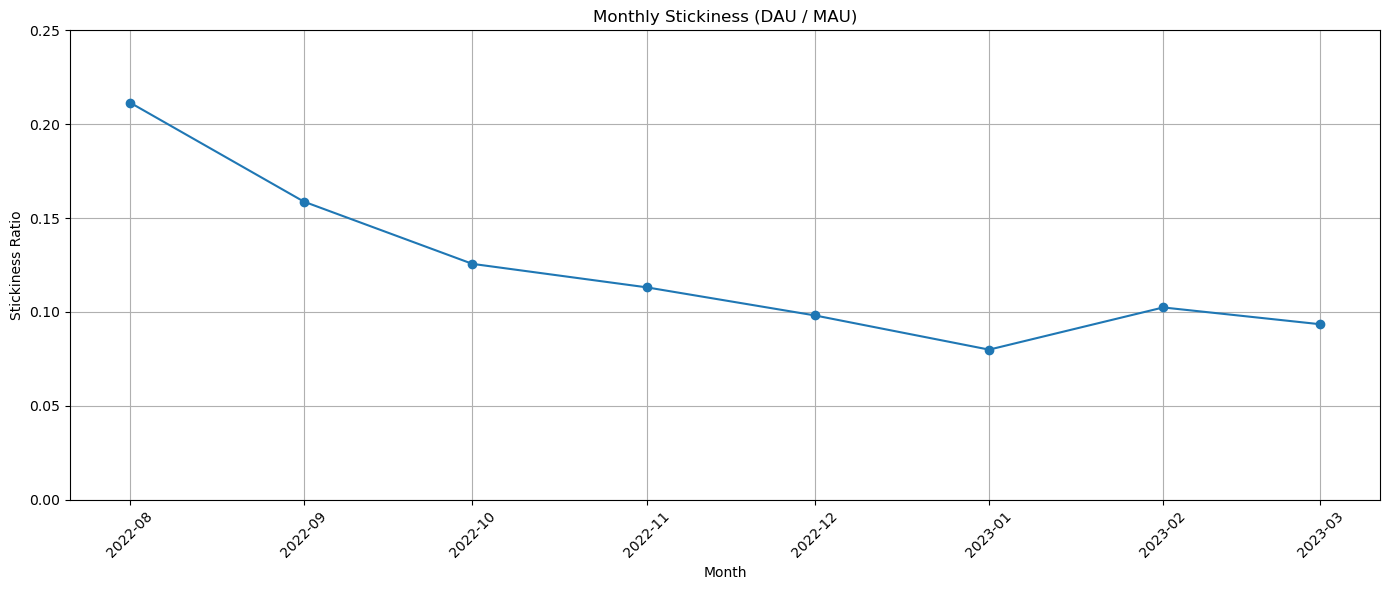

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/player_logged_in.csv')

data['Time'] = pd.to_datetime(data['Time'])

#Extracts the date and month
data['Date'] = data['Time'].dt.date
data['Month'] = data['Time'].dt.to_period('M').astype(str)

#Calculates DAU per day
dau_data = data.groupby('Date')['pid'].nunique().reset_index()
dau_data.columns = ['Date', 'DAU']
dau_data['Month'] = pd.to_datetime(dau_data['Date']).dt.to_period('M').astype(str)
#Calculates MAU per month
mau_data = data.groupby('Month')['pid'].nunique().reset_index()
mau_data.columns = ['Month', 'MAU']


#Calculates average DAU per month
avg_dau_per_month = dau_data.groupby('Month')['DAU'].mean().reset_index()
avg_dau_per_month.columns = ['Month', 'Avg_DAU']

#Merge DAU and MAU to compute Stickiness
stickiness_data = pd.merge(avg_dau_per_month, mau_data, on='Month')
stickiness_data['Stickiness'] = stickiness_data['Avg_DAU'] / stickiness_data['MAU']

#Converts month to datetime for plotting
stickiness_data['Month'] = pd.to_datetime(stickiness_data['Month'])


#Plots Stickiness Over Time
plt.figure(figsize=(14, 6))
plt.plot(stickiness_data['Month'], stickiness_data['Stickiness'], marker='o', linestyle='-')
plt.title('Monthly Stickiness (DAU / MAU)')
plt.xlabel('Month')
plt.ylabel('Stickiness Ratio')
plt.ylim(0, 0.25)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Reflection
- Stickiness reflects the average retention of players over a period of time.

# Observations
This game’s stickiness on release was high (0.22), indicating that around 22% of players were coming back regularly to replay the game. This sharply declined after the first month to around 15–10%.

There was then a resurgence in player retention (stickiness) in February 2023 before once again begining a lighter fall off in stickiness.

# Evaluation
The initial high level of stickiness is a common trend for new releases. Players who had been waiting for launch combined with hype, advertisements, and events surrounding the game, clearly contributed to this early engagement, as shown in the graph.

The drop in stickiness suggests players gradually lost interest possibly because the hype faded or they had played through major portions of the game and had little interest in replaying those areas.

The resurgence in February 2023 may indicate a boost in popularity, possibly triggered by social media buzz, a new update, or a patch. The decline that follows implies that a game must consistently release updates or maintain a strong online presence to retain its player base.